In [1]:
import TestImages: testimage
import ImageView: imshow

img = testimage("mandrill")
(xsize, ysize) = size(img)

(512, 512)

In [2]:
function warp(x, y, p)
    xcenter = p[:xcenter]
    ycenter = p[:ycenter]
    distance = sqrt((xcenter-x)^2 + (ycenter-y)^2)
    mod_ = 0.25*sin(p[:distance_coef]*(distance/(p[:time]+p[:shift]+0.1)))+0.75
    g(xcenter, x) = xcenter + (x - xcenter)*mod_
    xnew = g(xcenter, x)
    ynew = g(ycenter, y)
    xnew, ynew
end

warp (generic function with 1 method)

In [3]:
function apply_warp_medium_sparse(warp, im, p, factor = 10)
    (xsize, ysize) = size(im)
    p[:xsize] = xsize
    p[:ysize] = ysize
    function sparse_interpolation(x_y)
        # a rough draft, this can be improved; works on im
        x = x_y[1]
        y = x_y[2]
        if abs(mod(x,factor))<1 || abs(mod(y,factor))<1
            dx=mod(x,1)
            dy=mod(y,1)
            x_left = floor(Int,x)
            y_left = floor(Int,y)
            x_right = min(x_left + 1, xsize)
            y_right = min(y_left + 1, ysize)
            return im[x_left,y_left]*(1-dx)*(1-dy) + im[x_left,y_right]*(1-dx)*dy + im[x_right,y_left]*dx*(1-dy) + im[x_right, y_right]*dx*dy
        else
            return img[1,1]*0
        end
    end
    [sparse_interpolation(warp(x,y,p)) for x in 1:xsize, y in 1:ysize]
end

apply_warp_medium_sparse (generic function with 2 methods)

In [23]:
params = Dict(:distance_coef=>0.8, :xcenter=>61, :ycenter=>176)
params[:time] = 9
params[:shift] = params[:time]/(1+0.01*params[:time])
params

Dict{Symbol, Real} with 5 entries:
  :shift         => 8.25688
  :distance_coef => 0.8
  :xcenter       => 61
  :ycenter       => 176
  :time          => 9

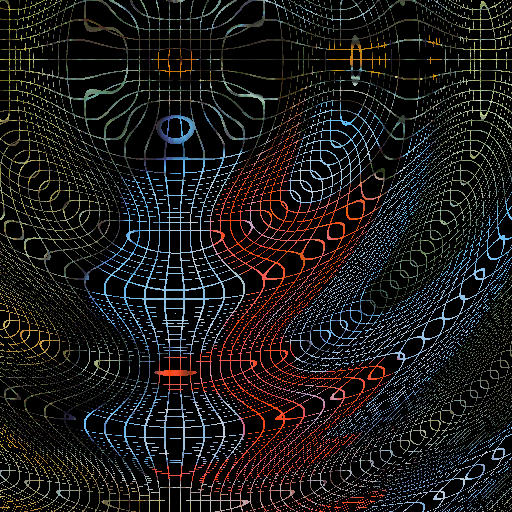

In [24]:
apply_warp_medium_sparse(warp, img, params)

In [29]:
params[:time] = 5
params[:shift] = params[:time]/(1+0.01*params[:time])
params

Dict{Symbol, Real} with 7 entries:
  :xsize         => 512
  :ysize         => 512
  :shift         => 4.7619
  :distance_coef => 0.8
  :xcenter       => 61
  :ycenter       => 176
  :time          => 5

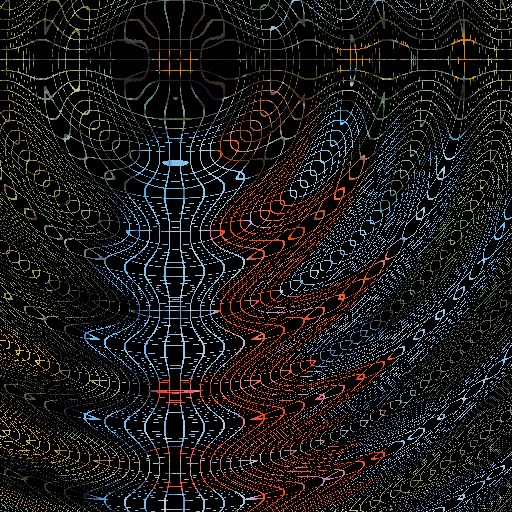

In [30]:
apply_warp_medium_sparse(warp, img, params)

81-element Vector{Matrix{ColorTypes.RGB}}:
 [RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0) … RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0); RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0) … RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0); … ; RGB{Float64}(0.48026715181514823,0.6116543398629489,0.6197234452009632) RGB{Float64}(0.4834115832512616,0.6021366227005912,0.5717827130089052) … RGB{Float64}(0.3775760125349408,0.2845959272159844,0.32478438243022345) RGB{Float64}(0.3137826780626776,0.24713976710848895,0.2784321125251639); RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0) … RGB{Float64}(0.017230087531014834,0.025926725292795622,0.008492407033506783) RGB{Float32}(0.0f0,0.0f0,0.0f0)]
 [RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float64}(0.2729258780704596,0.25176322726153755,0.17943952316881676) … RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0); RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float64}(0.4030322251689829,0.49121547648619635,0.22640849467596788) … RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0); … ; RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0) … RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float64}(0.37204111591470423,0.3407729972488587,0.3229917384970596); RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0) … RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0)]
 [RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0) … RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0); RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0) … RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0); … ; RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float64}(0.6189520638938286,0.6513163953283645,0.5738728682218488) … RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0); RGB{Float64}(0.5405140116550412,0.5563102951342429,0.5590551238458794) RGB{Float32}(0.0f0,0.0f0,0.0f0) … RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0)]
 [RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0) … RGB{Float64}(0.4907841996608211,0.5377846665619401,0.3231485564907842) RGB{Float64}(0.4859766885477999,0.533658806958817,0.3356006125840868); RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0) … RGB{Float64}(0.4949668417967494,0.5631034269729704,0.42914606077571416) RGB{Float64}(0.4780712698742265,0.5253350027869719,0.41110458262072863); … ; RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0) … RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float64}(0.5534524477124272,0.551558410537896,0.38909211498590485); RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0) … RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0)]
 [RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0) … RGB{Float64}(0.4940727194017158,0.5444176558215104,0.32715102083606407) RGB{Float32}(0.0f0,0.0f0,0.0f0); RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0) … RGB{Float64}(0.483035338683249,0.5376368052495817,0.40082635381506443) RGB{Float32}(0.0f0,0.0f0,0.0f0); … ; RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0) … RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0); RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0) … RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0)]
 [RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0) … RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0); RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0) … RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0); … ; RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float64}(0.633993765520589,0.5642143598973368,0.27459370817746087) … RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0); RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float32}(0.0f0,0.0f0,0.0f0) … RGB{Float32}(0.0f0,0.0f0,0.0f0) RGB{Float64}(0.23065965285725454,0.30700253736700805,0.22203915961492282)]
 [RGB{Float32}(0.
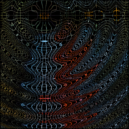
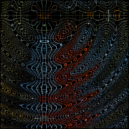
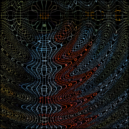
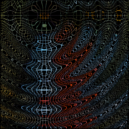
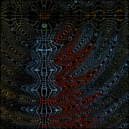
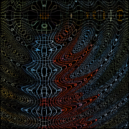
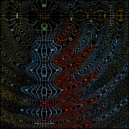
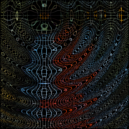
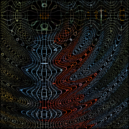
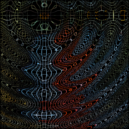
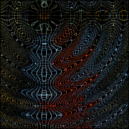
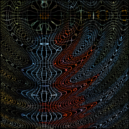
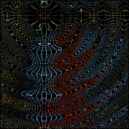
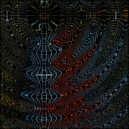
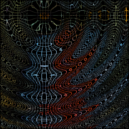
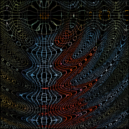
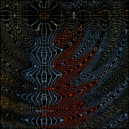
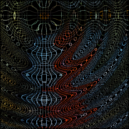
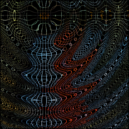
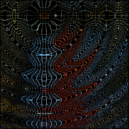
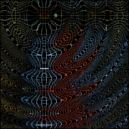
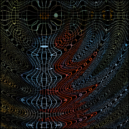
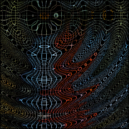
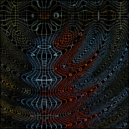
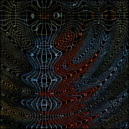
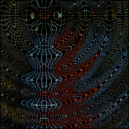
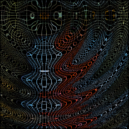
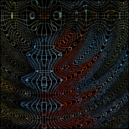
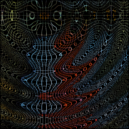
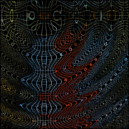
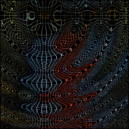
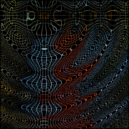
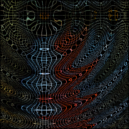
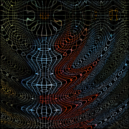
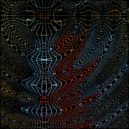
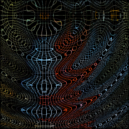
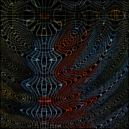
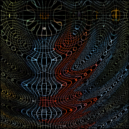
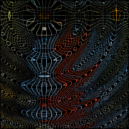
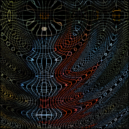
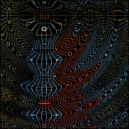
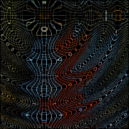
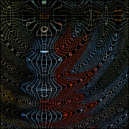
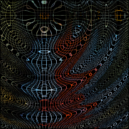
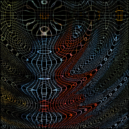
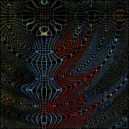
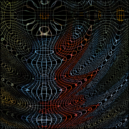
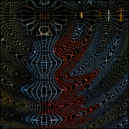
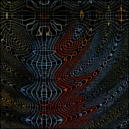
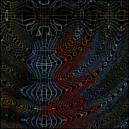
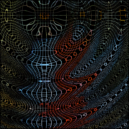
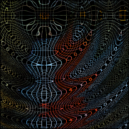
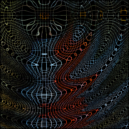
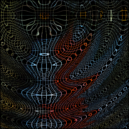
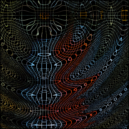
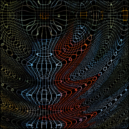
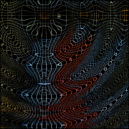
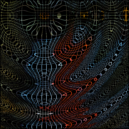
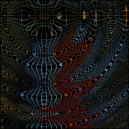
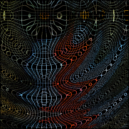
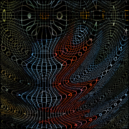
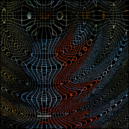
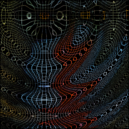
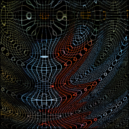
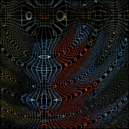
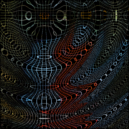
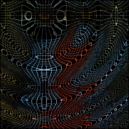
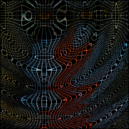
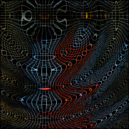
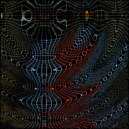
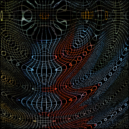
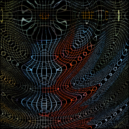
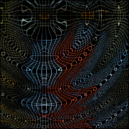
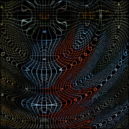
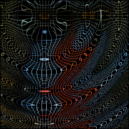
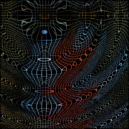
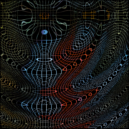
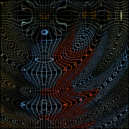
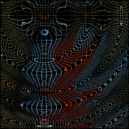
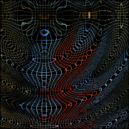
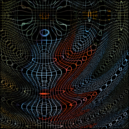

In [31]:
imgs_sparse = [apply_warp_medium_sparse(warp, img, params) for params[:time] in 5:0.05:9
                   for params[:shift] in [params[:time]/(1+0.01*params[:time])]]

In [32]:
zsize = length(imgs_sparse)

81

In [34]:
using FileIO

full_imgs = []
for i in 1:zsize
    push!(full_imgs, imgs_sparse[i])
end
for i in reverse(2:(zsize-1))
    push!(full_imgs, imgs_sparse[i])
end

save("exercise2-sparse.gif", cat(full_imgs..., dims=3), fps=15)